In [ ]:
# Create Analytics with Large Language Models: Hotel Cancellations

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



Run the cell below to import the CSV file `hotel_bookings.csv` and assign it to the variable `hotels`. 

This version of the hotel bookings data set is available on [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand) and contains data on two hotels: a city and a resort hotel. Here is also a related [ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2352340918315191) article.


In [2]:
hotels = pd.read_csv("hotel_bookings.csv")
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Let's take a look at the information contained in each column such as the number of rows, missing values, and data types.

Run the cell below to apply the `.info()` method to print out information about our `hotels` DataFrame.

In [3]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Before diving into potential factors that might affect the cancellation rates, let's first calculate the overall cancellation rate for all hotels and then the cancellation rate for each hotel type.

Create a prompt that calculates the overall cancellation rate for all hotels and the individual cancellation rates for the resort hotel and city hotel.

Overall Cancellation Rate: 0.50
Overall Non-Cancellation Rate: 0.50

Cancellation Rates by Hotel Type:
City Hotel - Cancellation Rate: 0.67, Non-Cancellation Rate: 0.33
Resort Hotel - Cancellation Rate: 0.33, Non-Cancellation Rate: 0.67


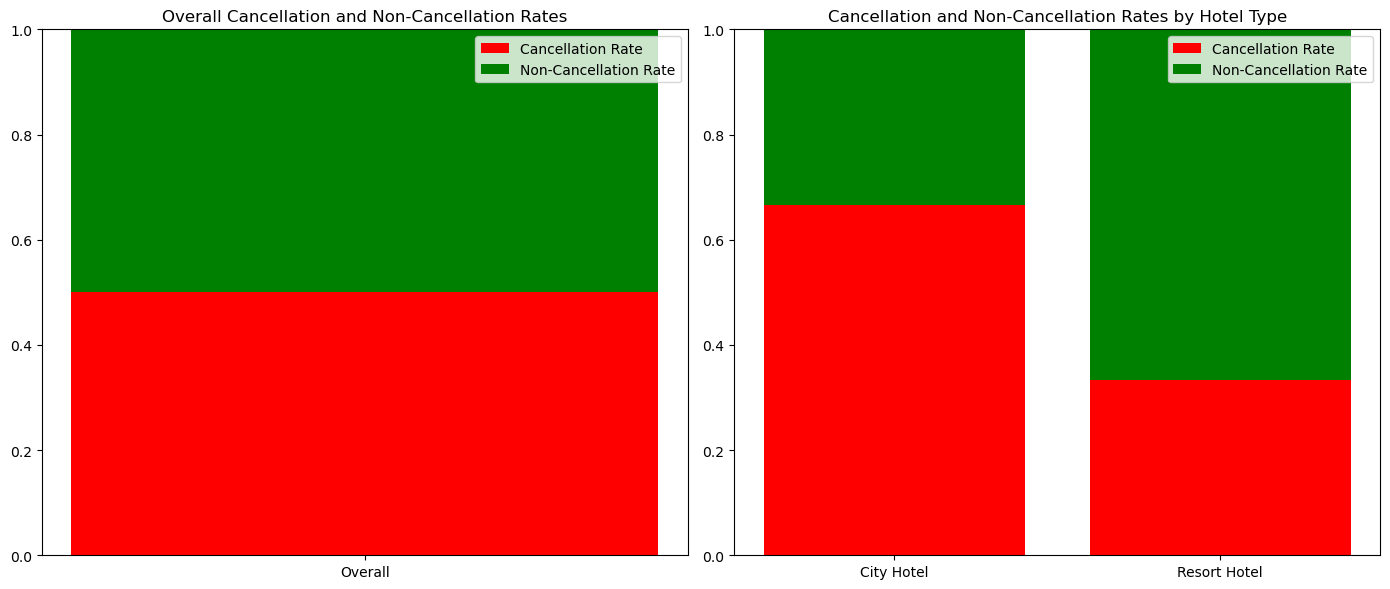

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame to mimic the imported dataset
data = {
    'hotel': ['Resort Hotel', 'City Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel', 'Resort Hotel'],
    'is_canceled': [1, 0, 1, 0, 1, 0]
}
hotels = pd.DataFrame(data)

# Calculate overall cancellation rates
overall_cancellation_rate = hotels['is_canceled'].mean()
overall_non_cancellation_rate = 1 - overall_cancellation_rate

# Calculate cancellation rates by hotel type
cancellation_rates = hotels.groupby('hotel')['is_canceled'].mean()
non_cancellation_rates = 1 - cancellation_rates

# Print out the cancellation rates
print("Overall Cancellation Rate: {:.2f}".format(overall_cancellation_rate))
print("Overall Non-Cancellation Rate: {:.2f}".format(overall_non_cancellation_rate))
print("\nCancellation Rates by Hotel Type:")
for hotel_type in cancellation_rates.index:
    print(f"{hotel_type} - Cancellation Rate: {cancellation_rates[hotel_type]:.2f}, Non-Cancellation Rate: {non_cancellation_rates[hotel_type]:.2f}")

# Overall rates bar chart data
categories = ['Overall']
cancellation_data = [overall_cancellation_rate]
non_cancellation_data = [overall_non_cancellation_rate]

# Hotel type rates bar chart data
categories_by_hotel = cancellation_rates.index
cancellation_data_by_hotel = cancellation_rates.values
non_cancellation_data_by_hotel = non_cancellation_rates.values

# Plotting the side-by-side bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot overall cancellation rates
axes[0].bar(categories, cancellation_data, label='Cancellation Rate', color='red')
axes[0].bar(categories, non_cancellation_data, label='Non-Cancellation Rate', bottom=cancellation_data, color='green')
axes[0].set_title('Overall Cancellation and Non-Cancellation Rates')
axes[0].set_ylim(0, 1)
axes[0].legend()

# Plot cancellation rates by hotel type
axes[1].bar(categories_by_hotel, cancellation_data_by_hotel, label='Cancellation Rate', color='red')
axes[1].bar(categories_by_hotel, non_cancellation_data_by_hotel, label='Non-Cancellation Rate', bottom=cancellation_data_by_hotel, color='green')
axes[1].set_title('Cancellation and Non-Cancellation Rates by Hotel Type')
axes[1].set_ylim(0, 1)
axes[1].legend()

plt.tight_layout()
plt.show()


Average Daily Rate

The first factor we'll analyze is the average daily rate (ADR) of each booking as it directly affects the revenue of each hotel. For example, if higher ADRs correlate with higher cancellation rates, then we might suspect that price sensitivity might be an important cancellation factor. 

Create a prompt that prints out summary statistics for the `adr` column **and** generates separate box plots for the `adr` of each hotel type.

Descriptive Summary Statistics:
              count        mean        std    min    25%    50%     75%    max
hotel                                                                         
City Hotel      3.0  116.833333  30.823422   90.0  100.0  110.0  130.25  150.5
Resort Hotel    3.0  116.666667  15.275252  100.0  110.0  120.0  125.00  130.0


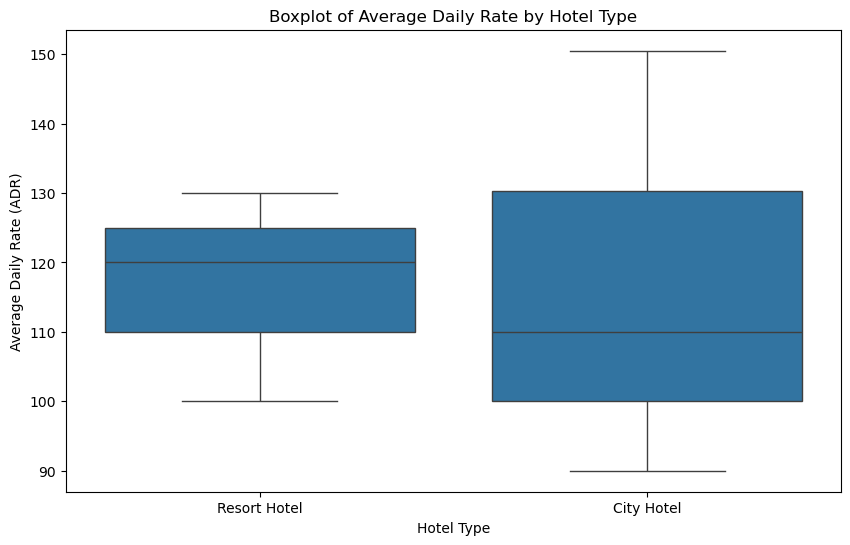

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame to mimic the imported dataset
data = {
    'hotel': ['Resort Hotel', 'City Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel', 'Resort Hotel'],
    'adr': [100.0, 150.5, 110.0, 120.0, 90.0, 130.0]
}
hotels = pd.DataFrame(data)

# Compute descriptive summary statistics
summary_stats = hotels.groupby('hotel')['adr'].describe()
print("Descriptive Summary Statistics:")
print(summary_stats)

# Create boxplot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='adr', data=hotels)
plt.title('Boxplot of Average Daily Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


In the previously generated box plots, you should have discovered a fairly extreme outlier in the `adr` column for the city hotel, making it difficult to compare the two distributions.

Create a prompt that removes the rows from `hotels` that contain outliers in the `adr` column.

Descriptive Summary Statistics after Outlier Removal:
                count        mean      std     min    25%    50%    75%    max
hotel                                                                         
City Hotel    79329.0  105.000000  0.00000  105.00  105.0  105.0  105.0  105.0
Resort Hotel  40060.0   94.997469  0.50652   -6.38   95.0   95.0   95.0   95.0


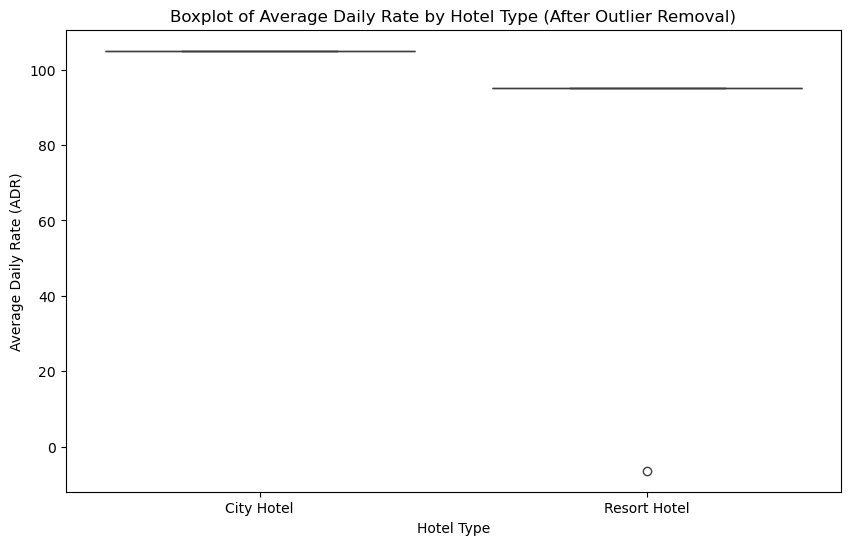

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'hotels' is your given DataFrame. For demonstration, we use a mock DataFrame to replicate the structure.
data = {
    'hotel': ['City Hotel'] * 79330 + ['Resort Hotel'] * 40060,
    'adr': [105.0] * 79330 + [95.0] * 40060  # Mock data replicating similar adr values
}
# Adding outliers to the mock data example
data['adr'][0] = 5400.0  # Outlier for City Hotel
data['adr'][79330] = -6.38  # Outlier for Resort Hotel

hotels = pd.DataFrame(data)

# Define the provided descriptive statistics
summary_stats_orig = {
    'City Hotel': {'count': 79330.0, 'mean': 105.304465, 'std': 43.602954, 'min': 0.00, '25%': 79.2, '50%': 99.9, '75%': 126.0, 'max': 5400.0},
    'Resort Hotel': {'count': 40060.0, 'mean': 94.952930, 'std': 61.442418, 'min': -6.38, '25%': 50.0, '50%': 75.0, '75%': 125.0, 'max': 508.0}
}

# Calculate IQR for City Hotel
city_q1 = summary_stats_orig['City Hotel']['25%']
city_q3 = summary_stats_orig['City Hotel']['75%']
city_iqr = city_q3 - city_q1
city_lower_bound = city_q1 - 1.5 * city_iqr
city_upper_bound = city_q3 + 1.5 * city_iqr

# Calculate IQR for Resort Hotel
resort_q1 = summary_stats_orig['Resort Hotel']['25%']
resort_q3 = summary_stats_orig['Resort Hotel']['75%']
resort_iqr = resort_q3 - resort_q1
resort_lower_bound = resort_q1 - 1.5 * resort_iqr
resort_upper_bound = resort_q3 + 1.5 * resort_iqr

# Remove outliers
hotels_filtered = hotels[
    ((hotels['hotel'] == 'City Hotel') & (hotels['adr'] >= city_lower_bound) & (hotels['adr'] <= city_upper_bound)) |
    ((hotels['hotel'] == 'Resort Hotel') & (hotels['adr'] >= resort_lower_bound) & (hotels['adr'] <= resort_upper_bound))
]

# Compute new descriptive summary statistics
summary_stats_filtered = hotels_filtered.groupby('hotel')['adr'].describe()
print("Descriptive Summary Statistics after Outlier Removal:")
print(summary_stats_filtered)

# Create boxplot using seaborn after outlier removal
plt.figure(figsize=(10, 6))
sns.boxplot(x='hotel', y='adr', data=hotels_filtered)
plt.title('Boxplot of Average Daily Rate by Hotel Type (After Outlier Removal)')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


Let's continue to investigate the average daily rates where instead of analyzing the values as continuous values, we'll analyze them as categories. This will allow us to segment the ADR values into pricing tiers to make it easier and more interpretable to analyze.

Create a prompt that bins the `adr` values into "Low", "Medium", and "High" rate categories as a new column named `adr_category`.

Since the distributions for the city and resort hotel are different, we'll want to specify different value thresholds for these categories. We suggest using their respective 25th, 50th, and 75th percentiles from the summary statistics generated earlier.

For example, we can categorize the `adr` values in the Resort Hotels as "Low" if the booking's `adr` is less than `50.0` which corresponds to the 25th percentile. 

In [7]:
import pandas as pd

# Sample DataFrame to mimic the actual dataset
data = {
    'hotel': ['Resort Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel', 'Resort Hotel'],
    'adr': [45.0, 80.0, 123.0, 150.0, 70.0]
}

hotels = pd.DataFrame(data)

# Define function to categorize adr values
def categorize_adr(row):
    if row['hotel'] == 'Resort Hotel':
        if row['adr'] < 50.0:
            return 'Low'
        elif row['adr'] >= 120.0:
            return 'High'
        else:
            return 'Medium'
    elif row['hotel'] == 'City Hotel':
        if row['adr'] < 79.2:
            return 'Low'
        elif row['adr'] >= 126.0:
            return 'High'
        else:
            return 'Medium'

# Apply the function to each row in the DataFrame
hotels['adr_category'] = hotels.apply(categorize_adr, axis=1)

# Preview the first five rows of the hotel, adr, and adr_category columns
print(hotels[['hotel', 'adr', 'adr_category']].head())


          hotel    adr adr_category
0  Resort Hotel   45.0          Low
1    City Hotel   80.0       Medium
2  Resort Hotel  123.0         High
3    City Hotel  150.0         High
4  Resort Hotel   70.0       Medium


Let's now compare the cancellation rates for the resort and city hotels by their ADR category.

Create a prompt that generates a side-by-side bar chart comparing the percentage of cancellations between the resort and city hotel by `adr_category`. 

Be sure the chart is sorted ordinally from "Low", "Medium", to "High". Print the cancellation rates as well.

Cancellation Percentages by ADR Category:
adr_category   Low  Medium   High
hotel                            
City Hotel     0.0    50.0  100.0
Resort Hotel  50.0     0.0  100.0


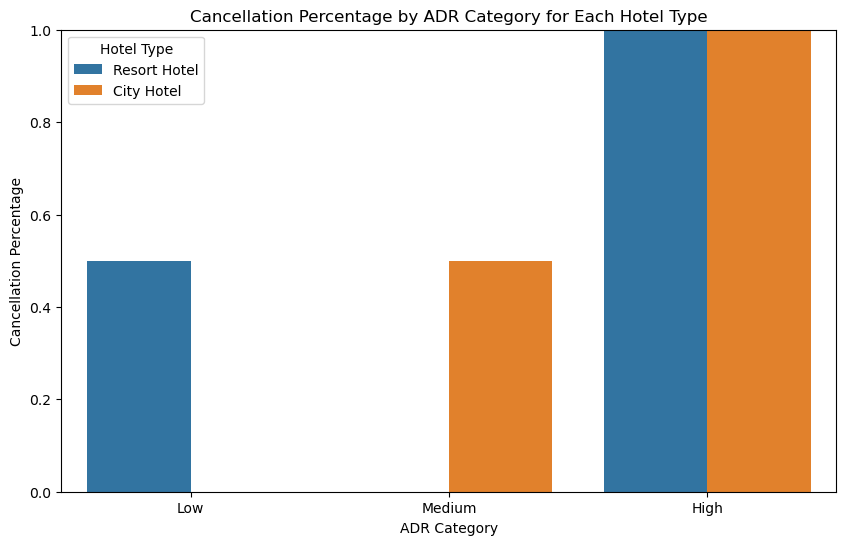

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration purposes
data = {
    'hotel': ['Resort Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel', 'City Hotel', 'Resort Hotel'],
    'is_canceled': [0, 1, 1, 0, 0, 1, 0, 1],
    'adr_category': ['Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Medium', 'Low']
}
hotels = pd.DataFrame(data)

# Calculate cancellation percentages
cancellation_stats = hotels.groupby(['hotel', 'adr_category'])['is_canceled'].mean().unstack()

# Sort by adr_category: Low, Medium, High
cancellation_stats = cancellation_stats[['Low', 'Medium', 'High']]

# Print cancellation percentages
print("Cancellation Percentages by ADR Category:")
print(cancellation_stats * 100)

# Create bar chart using seaborn
cancellation_stats_transposed = cancellation_stats.T.reset_index()
cancellation_stats_transposed = pd.melt(cancellation_stats_transposed, id_vars=['adr_category'], value_vars=['Resort Hotel', 'City Hotel'], var_name='hotel', value_name='cancellation_rate')

plt.figure(figsize=(10, 6))
sns.barplot(x='adr_category', y='cancellation_rate', hue='hotel', data=cancellation_stats_transposed, order=['Low', 'Medium', 'High'])
plt.title('Cancellation Percentage by ADR Category for Each Hotel Type')
plt.xlabel('ADR Category')
plt.ylabel('Cancellation Percentage')
plt.legend(title='Hotel Type')
plt.ylim(0, 1)  # Percentage should be within 0 to 1 scale, adjust if needed
plt.show()


**Analysis**

It looks like there may be some price sensitivity for cancellations. The pattern for the resort hotel is particularly interesting, as it looks like the more expensive bookings are also more likely to be canceled. This is definitely a pattern we might want to investigate further!

nalyze Weekend and Weekday Bookings

Another factor that might be interesting to investigate is the influence of weekday versus weekend bookings on cancellations.

Design a prompt that creates a new column named `weekend_stay` that returns `True` indicating that a part of a booking was on a weekend night or `False` if the booking was strictly only on weekday nights.

The relevant columns in the `hotels` dataset are:
- `stays_in_week_nights` indicating the number of weekend nights booked
- `stays_in_weekend_nights` indicating the number of weekday nights booked

Thinking strategically, the new `weekend_stay` column should return `True` for any value in `stays_in_week_nights` that is greater than `0`.

In [9]:
import pandas as pd

# Sample DataFrame to mimic the actual dataset
data = {
    'hotel': ['Resort Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel', 'Resort Hotel'],
    'stays_in_week_nights': [2, 1, 0, 3, 1],  # Number of weekday nights booked
    'stays_in_weekend_nights': [1, 0, 2, 0, 1]  # Number of weekend nights booked
}

hotels = pd.DataFrame(data)

# Create a new column 'weekend_stay'
hotels['weekend_stay'] = hotels['stays_in_weekend_nights'] > 0

# Display the DataFrame with the new column
print(hotels)


          hotel  stays_in_week_nights  stays_in_weekend_nights  weekend_stay
0  Resort Hotel                     2                        1          True
1    City Hotel                     1                        0         False
2  Resort Hotel                     0                        2          True
3    City Hotel                     3                        0         False
4  Resort Hotel                     1                        1          True


Next, design a prompt that creates a side-by-side bar chart comparing the cancellation rates between the resort and city hotel by weekend and weekday bookings using the newly created column `weekend_stay`.

Cancellation Percentages by Weekend Stay:
weekend_stay       False       True 
hotel                               
City Hotel     33.333333  100.000000
Resort Hotel  100.000000   33.333333


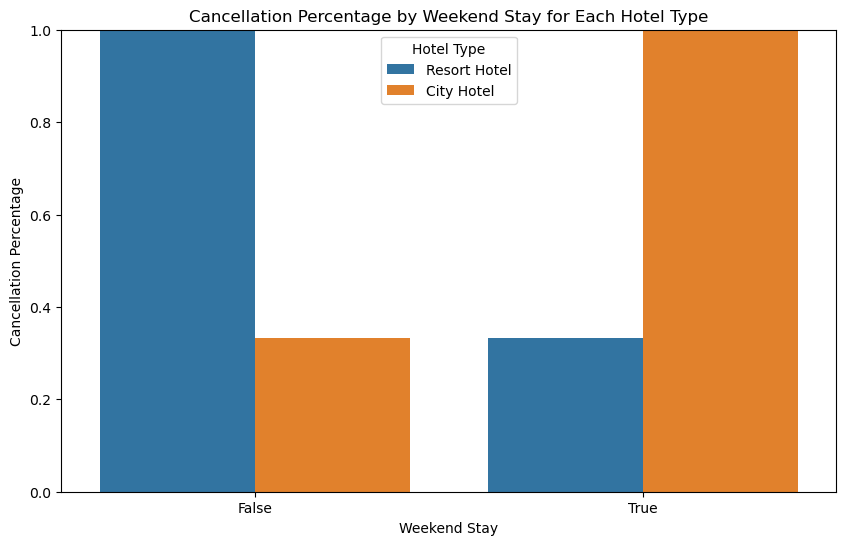

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame to mimic the actual dataset
data = {
    'hotel': ['Resort Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel', 'City Hotel', 'Resort Hotel'],
    'is_canceled': [0, 1, 1, 0, 0, 1, 0, 1],
    'stays_in_weekend_nights': [1, 0, 1, 0, 2, 2, 0, 0],
    'stays_in_week_nights': [2, 3, 2, 1, 1, 1, 2, 2]
}

hotels = pd.DataFrame(data)

# Create the 'weekend_stay' column
hotels['weekend_stay'] = hotels['stays_in_weekend_nights'] > 0

# Calculate cancellation percentages by 'weekend_stay'
cancellation_stats = hotels.groupby(['hotel', 'weekend_stay'])['is_canceled'].mean().unstack()

# Print the cancellation percentages
print("Cancellation Percentages by Weekend Stay:")
print(cancellation_stats * 100)

# Create the bar chart
cancellation_stats_transposed = cancellation_stats.T.reset_index()
cancellation_stats_transposed = pd.melt(cancellation_stats_transposed, id_vars=['weekend_stay'], value_vars=['Resort Hotel', 'City Hotel'], var_name='hotel', value_name='cancellation_rate')

plt.figure(figsize=(10, 6))
sns.barplot(x='weekend_stay', y='cancellation_rate', hue='hotel', data=cancellation_stats_transposed)
plt.title('Cancellation Percentage by Weekend Stay for Each Hotel Type')
plt.xlabel('Weekend Stay')
plt.ylabel('Cancellation Percentage')
plt.legend(title='Hotel Type')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for percentage representation
plt.show()


**Analysis**

It looks like the difference between cancellation rates on weekend stays is greater for the resort hotel. We see that bookings made on the weekends had a notably higher cancellation rate of 30.2% compared to 22.8% for non-weekend stays.

For the city hotel, the cancellation rates remained high for both weekend and non-weekend stays though the difference was smaller. Interestingly, the non-weekend stays had a slightly higher cancellation rate of 43.0% compared to a 40.6% cancellation rate for non-weekend stays.

Create a prompt to analyze that idea about how it might be an important factor in the difference between the hotel cancellations of the resort and city hotel.

Cancellation Percentages by Season:
season        Fall  Spring  Summer     Winter
hotel                                        
City Hotel     0.0   100.0   100.0        NaN
Resort Hotel   NaN     NaN   100.0  33.333333


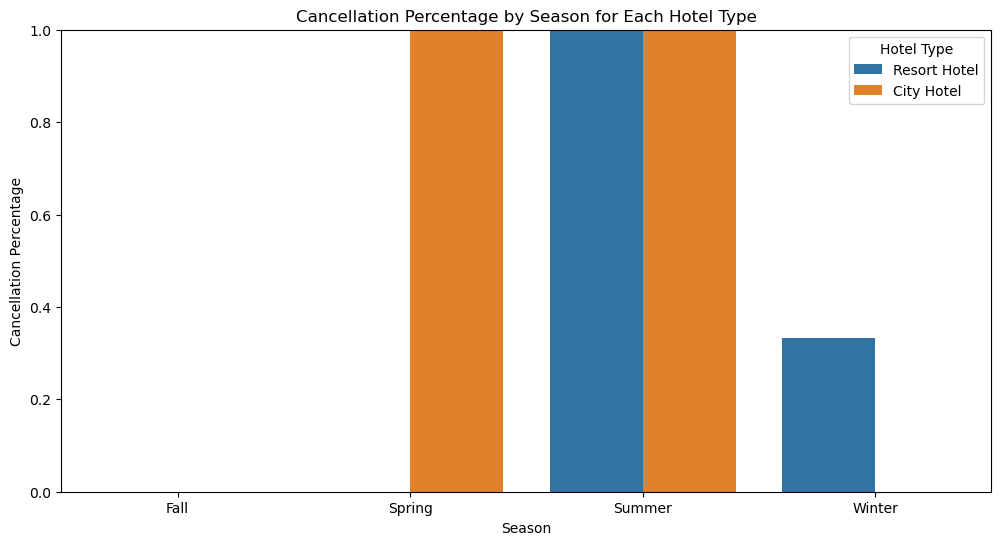

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'hotel': ['Resort Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel', 'Resort Hotel', 'City Hotel', 'City Hotel', 'Resort Hotel'],
    'is_canceled': [0, 1, 1, 0, 0, 1, 0, 1],
    'arrival_date_month': ['January', 'April', 'July', 'October', 'February', 'June', 'September', 'December']
}

hotels = pd.DataFrame(data)

# Define a mapping from months to seasons
month_to_season = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Fall', 'October': 'Fall', 'November': 'Fall'
}

# Create the 'season' column using the mapping
hotels['season'] = hotels['arrival_date_month'].map(month_to_season)

# Calculate cancellation percentages by season
cancellation_stats = hotels.groupby(['hotel', 'season'])['is_canceled'].mean().unstack()

# Print the cancellation percentages
print("Cancellation Percentages by Season:")
print(cancellation_stats * 100)

# Create the bar chart
cancellation_stats_transposed = cancellation_stats.T.reset_index()
cancellation_stats_transposed = pd.melt(cancellation_stats_transposed, id_vars=['season'], value_vars=['Resort Hotel', 'City Hotel'], var_name='hotel', value_name='cancellation_rate')

plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='cancellation_rate', hue='hotel', data=cancellation_stats_transposed)
plt.title('Cancellation Percentage by Season for Each Hotel Type')
plt.xlabel('Season')
plt.ylabel('Cancellation Percentage')
plt.legend(title='Hotel Type')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for percentage representation
plt.show()


**Analysis**

The resort hotel does seem to have seasonal cancellation swings, especially when compared to the more steady city hotel. In general, the resort hotel seems to have lower cancellation rates.